# Time Series Data Visualization Using Python

In [1]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 441.9 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for html5lib>=1.1 from https://files.pythonhosted.org/packages/6c/dd/a834df6482147d48e225a49515aabc2897

In [57]:
import yfinance as yf

In [58]:
ticker_symbol = 'ADANIGREEN.NS'

In [59]:
data = yf.download(ticker_symbol, start='2020-01-01', end='2024-05-20')

[*********************100%%**********************]  1 of 1 completed


# Loading the Dataset

In [60]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,169.350006,174.750000,168.100006,174.750000,174.750000,5417952
2020-01-02,179.149994,183.449997,177.550003,183.449997,183.449997,3087009
2020-01-03,187.800003,192.600006,183.000000,192.600006,192.600006,3670040
2020-01-06,200.000000,202.199997,185.550003,200.600006,200.600006,9497209
2020-01-07,208.000000,210.600006,203.000000,210.600006,210.600006,2126797
...,...,...,...,...,...,...
2024-05-13,1710.099976,1735.000000,1660.000000,1715.150024,1715.150024,3451084
2024-05-14,1719.000000,1800.000000,1685.000000,1788.800049,1788.800049,3657569
2024-05-15,1790.000000,1845.000000,1782.650024,1839.150024,1839.150024,8281198


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [62]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [63]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,169.350006,174.750000,168.100006,174.750000,174.750000,5417952
2020-01-02,179.149994,183.449997,177.550003,183.449997,183.449997,3087009
2020-01-03,187.800003,192.600006,183.000000,192.600006,192.600006,3670040
2020-01-06,200.000000,202.199997,185.550003,200.600006,200.600006,9497209
2020-01-07,208.000000,210.600006,203.000000,210.600006,210.600006,2126797


# Plotting Line plot for Time Series data:

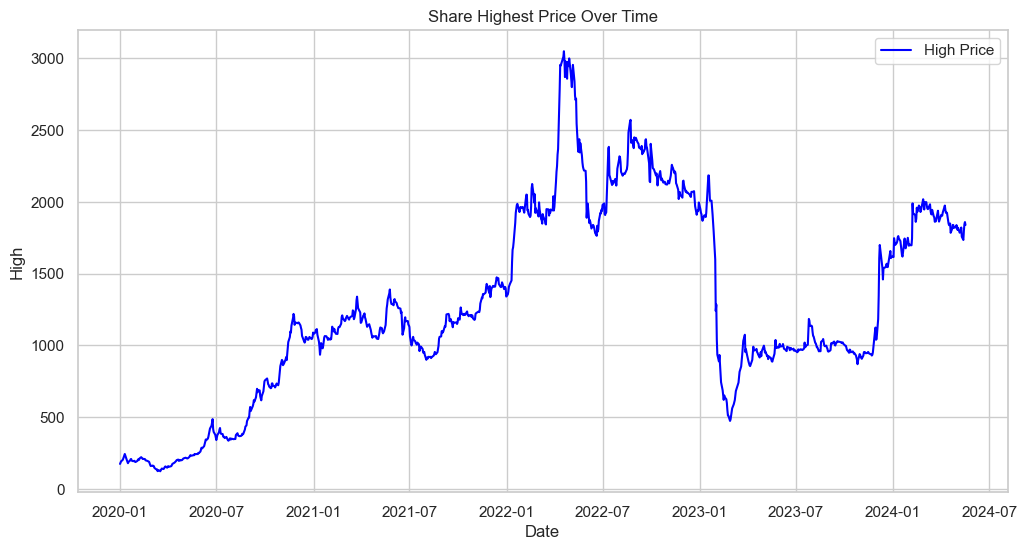

In [64]:
sns.set(style='whitegrid')

plt.figure(figsize=(12,6))
sns.lineplot(data=data,x='Date',y='High',label='High Price',color='blue')

#adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

# Resampling

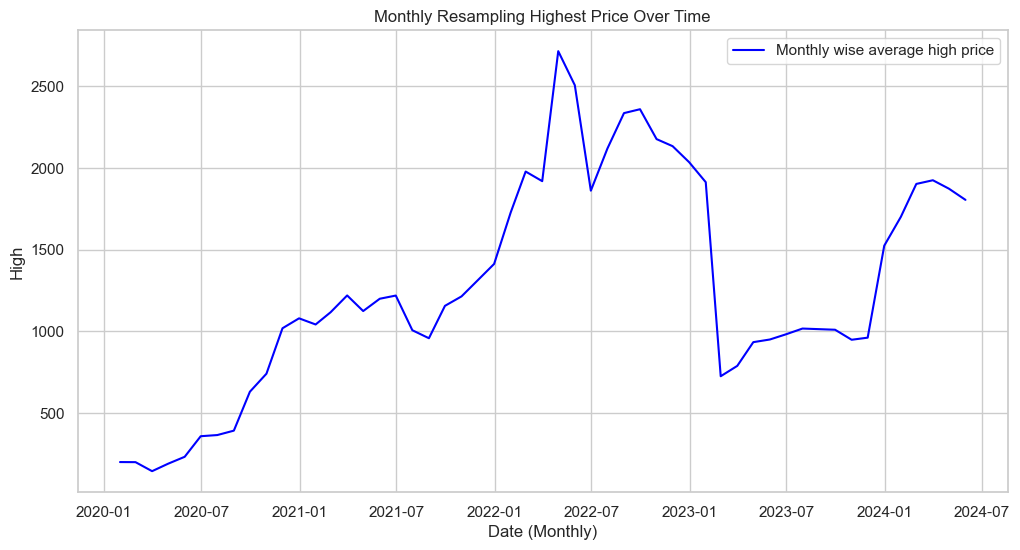

In [66]:
data_resampled = data.resample('M').mean()

sns.set(style='whitegrid')

plt.figure(figsize=(12,6))
sns.lineplot(data=data_resampled, x=data_resampled.index,y='High',label='Monthly wise average high price',color='blue')

#adding label and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

# Detecting Stationarity

In [70]:
from statsmodels.tsa.stattools import adfuller
 
# Assuming data is your DataFrame
result = adfuller(data['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.818366577365122
p-value: 0.37138207322131517
Critical Values: {'1%': -3.436419361753321, '5%': -2.864219865461312, '10%': -2.5681968527091907}


# Smoothening the data using Differencing and Moving Average

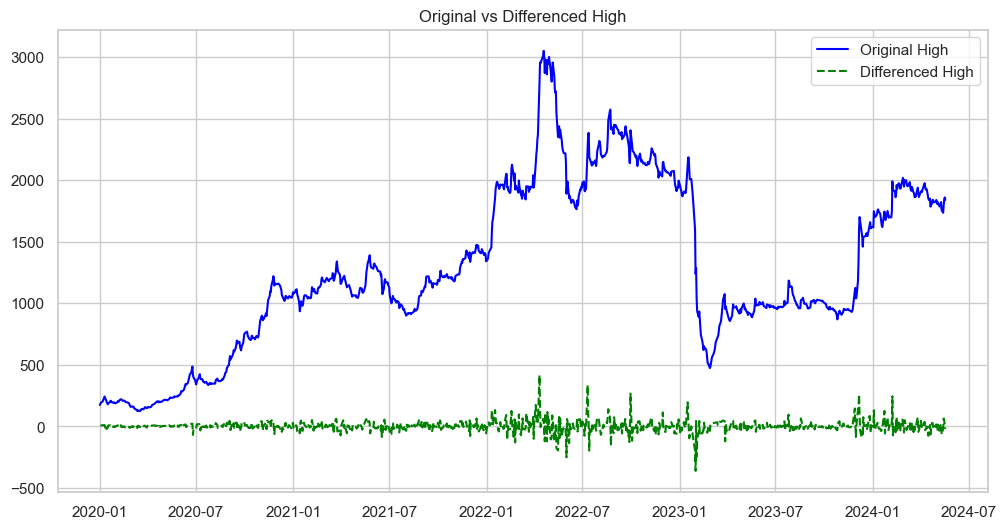

In [72]:
#differencing
data['high_diff'] = data['High'].diff()

#plotting
plt.figure(figsize=(12,6))
plt.plot(data['High'], label='Original High', color='blue')
plt.plot(data['high_diff'],label='Differenced High', linestyle='--',color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

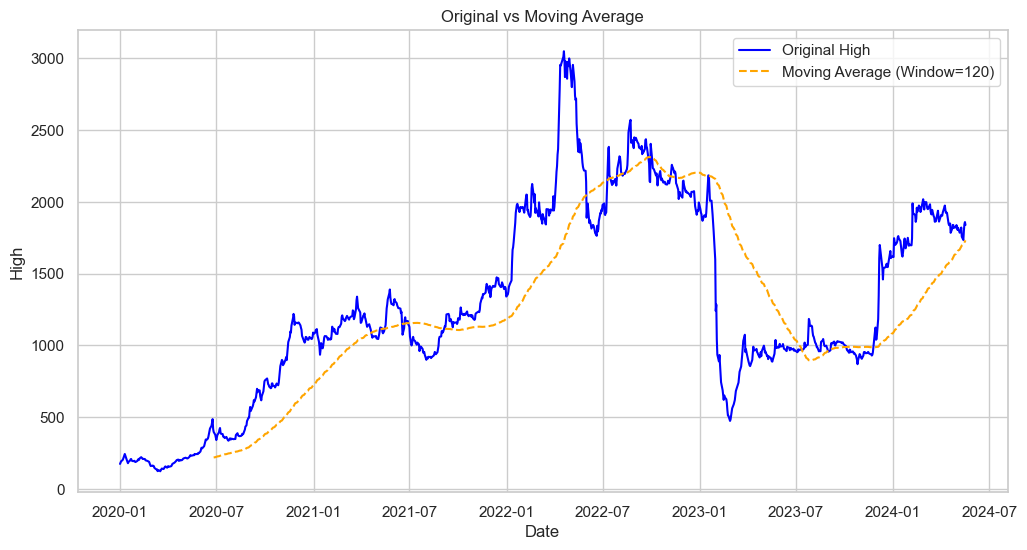

In [73]:
#moving average
window_size = 120
data['high_smoothed'] = data['High'].rolling(window=window_size).mean()

#plotting
plt.figure(figsize=(12,6))

plt.plot(data['High'],label='Original High',color='blue')
plt.plot(data['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

# Original Data vs Differenced Data

In [74]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
data_combined = pd.concat([data['High'], data['high_diff']], axis=1)
 
# Display the combined DataFrame
print(data_combined.head())

                  High  high_diff
Date                             
2020-01-01  174.750000        NaN
2020-01-02  183.449997   8.699997
2020-01-03  192.600006   9.150009
2020-01-06  202.199997   9.599991
2020-01-07  210.600006   8.400009


In [75]:
# Remove rows with missing values
data.dropna(subset=['high_diff'], inplace=True)
data['high_diff'].head()

Date
2020-01-02     8.699997
2020-01-03     9.150009
2020-01-06     9.599991
2020-01-07     8.400009
2020-01-08    10.500000
Name: high_diff, dtype: float64

In [76]:
from statsmodels.tsa.stattools import adfuller
 
# Assuming data is your DataFrame
result = adfuller(data['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -16.280420242319753
p-value: 3.41662331361476e-29
Critical Values: {'1%': -3.436419361753321, '5%': -2.864219865461312, '10%': -2.5681968527091907}


In [77]:
#Based on the ADF Statistici.e < all Critical Values, So, we reject the null hypothesis and conclude that we have enough evidence to reject the null hypothesis. The data appear to be stationary according to the Augmented Dickey-Fuller test.
#This suggests that differencing or other transformations may be needed to achieve stationarity before applying certain time series models.